In [1]:
from code.io.EventProcessor import EventProcessor
from code.io.TrackingProcessor import TrackingProcessor
from code.io.PossessionProcessor import PossessionProcessor
from code.io.ActionProcessor import ActionProcessor

from code.util.StatsUtil import StatsUtil
from code.util.ShotRegionUtil import ShotRegionUtil
from code.util.VisUtil import VisUtil
from code.util.FeatureUtil import FeatureUtil

import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['animation.ffmpeg_path'] = r'C:\FFmpeg\bin\ffmpeg.exe'

In [2]:
GAME_ID = "0022300869"

event_df = EventProcessor.load_games()
tracking_df = TrackingProcessor.load_games()
possession_df = PossessionProcessor.load_games()

In [ ]:
# true_point_events = StatsUtil.calculate_true_points(event_df)
# true_point_events.to_csv('true_points.csv')
# true_point_events['true_points_produced'].value_counts()

In [ ]:
# transition_events = EventProcessor.extract_transition_opportunities(event_df)
# event = transition_events[0]
# start, end = EventProcessor.get_start_end_time_of_event(event)
# moment_df = TrackingProcessor.extract_moment_from_timestamps(tracking_df, start, end)
# possession = PossessionProcessor.extract_possession_by_timestamp(possession_df, end)
# cross_3pt = FeatureUtil.find_ball_crossing_far_three_point_line(moment_df, possession.iloc[0]["basketX"])
# cross_half = FeatureUtil.find_ball_crossing_halfcourt(moment_df, possession.iloc[0]["basketX"])
# in_zone_of_death = FeatureUtil.find_ball_moment(moment_df, FeatureUtil.is_in_zone_of_death, possession.iloc[0]["basketX"])
# print(cross_3pt, cross_half, in_zone_of_death)

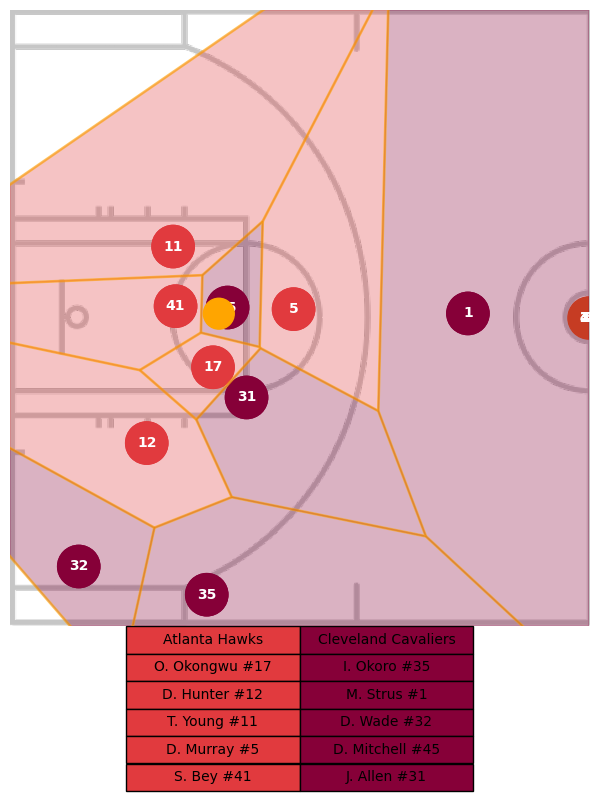

In [ ]:
shot_rebound_classified_df = pd.read_csv('./data/results/shot_rebound_classified.csv')
hexbin_region_data_df = pd.read_csv('./data/results/rebound_hexmap_distributions.csv')

possession = shot_rebound_classified_df.iloc[0]
moment_df = TrackingProcessor.extract_moment_from_timestamps(tracking_df, possession['wcStart'], possession['wcEnd'])
anim = VisUtil(moment_df)
anim.plot_voronoi_at_timestamp(possession['shot_time'], possession["basket_x"])

In [ ]:
StatsUtil.calculate_rebound_chances(moment_df, possession['shot_time'], hexbin_region_data_df.loc[hexbin_region_data_df['region'] == possession['shot_classification']], possession['basket_x'])

({}, {})

In [ ]:
# shot_rebound_df = ActionProcessor.extract_shots_and_rebounds(event_df, tracking_df, possession_df)
# shot_rebound_classified_df = FeatureUtil.classify_shot_locations(shot_rebound_df, possession_df, FeatureUtil.classify_shot_region)
# VisUtil.plot_shots_and_regions(shot_rebound_classified_df)

In [ ]:
# shot_rebound_classified_df = pd.read_csv('./data/results/shot_rebound_classified.csv')
# VisUtil.plot_court_hexmap(shot_rebound_classified_df, 'rebound_x', 'rebound_y')
# rebound_regions_df = StatsUtil.generate_region_hexbin_data(shot_rebound_classified_df, ShotRegionUtil.regions)
# rebound_regions_df.to_csv('./data/results/rebound_hexmap_distributions.csv')

In [ ]:
StatsUtil.assign_rebound_chances_to_shots(shot_rebound_classified_df.copy().iloc[:10], tracking_df, hexbin_region_data_df)

IndexError: index 0 is out of bounds for axis 0 with size 0